<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


1. p_value for t-test is 0.004

1. Data indicates a statistically significant difference in the median value of houses
bounded by the Charles River as opposed to those houses not bounded by the Charles River.

2. p_value for Levene"s test is 0.032

2. Levene"s test shows statistically unequal variances, therefore analysis of variance is
invalidated

If we still run the ANOVA test, the results are:

2. The p_value from the f-distribution is 0.0, to 3 decimal places

2. There is a statistically significant difference in the median values of houses
for each proportion of owner-occupied units built prior to 1940

3. The p_value from the correlation test is 0.0, to 3 decimal places

3. Based on the data, we can conclude that there is a relationship between nitric
oxide concentrations and proportion of non-retail business acres per town

4. The p_value for the relationship between the weighted distance and the median value is 0.0, to 3 decimal places

4. The coefficient value for weighted di

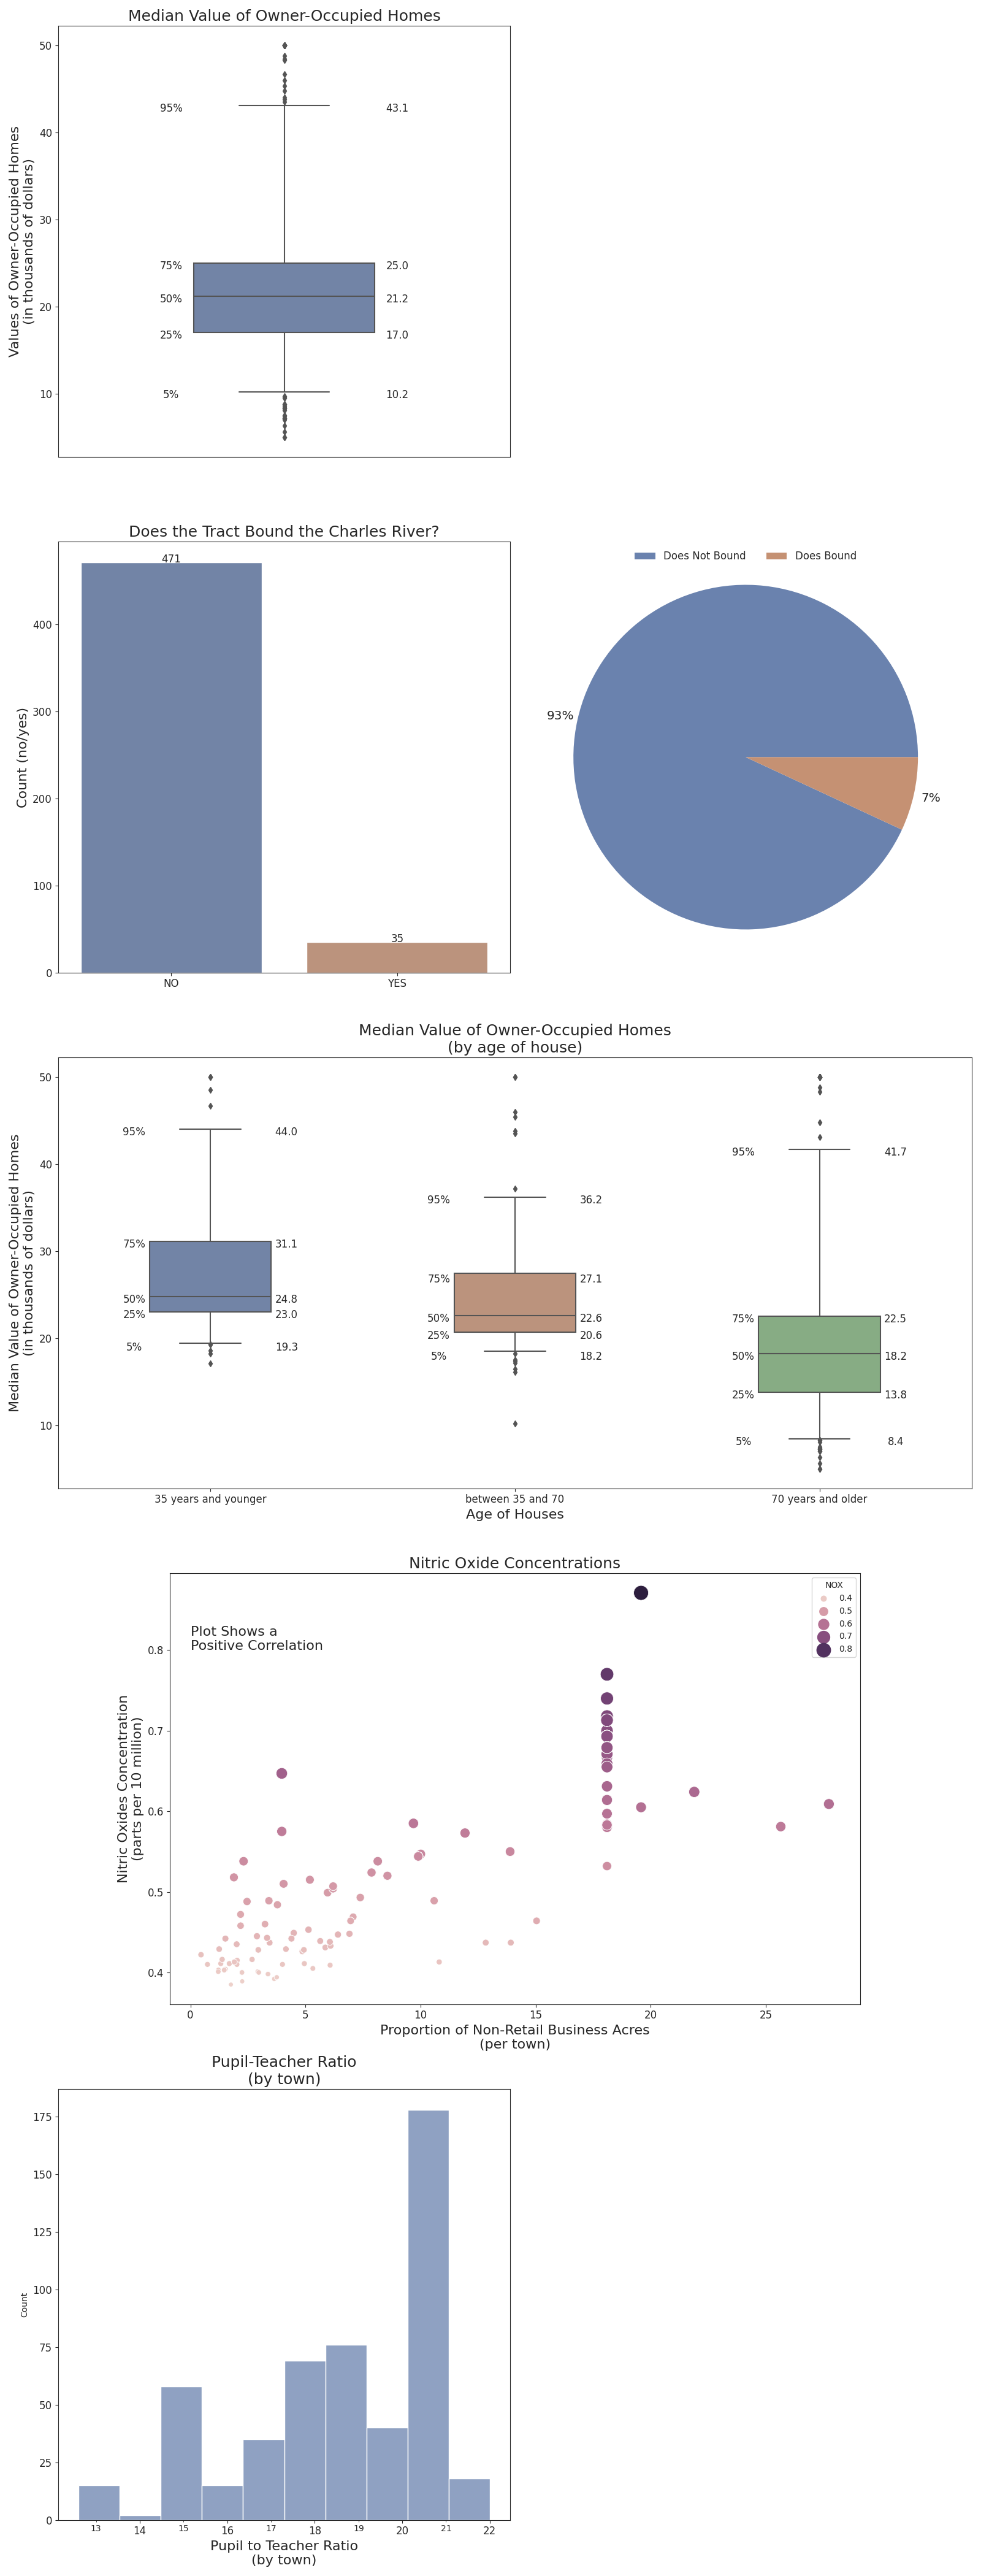

In [12]:
# Start with some settings
sns.set_style(style='ticks', rc=None)
sns.set_palette('muted', 4, 0.5)
fig = plt.figure(num=9, figsize=(16,42))
plt.tight_layout(h_pad=0.5)

# Set up some variables
box_title = ['Median Value of Owner-Occupied Homes', 'Median Value of Owner-Occupied Homes\n(by age of house)']
box_percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
title_font = {'size': 18}
axis_font = {'size': 16}
alpha = 0.05 # the level of significance (compared to p-value)

# boxplot annotation function
def annotate_box(data, ax, xpos):
    # setup some local variables
    vertical_offset = -0.7
    #xpos = 0.320
    xoffset = 0.25
    # annotate the box and whiskers
    for i, percent in enumerate(box_percentages):
        ax.annotate(str(round(percent*100))+'%', (xpos-xoffset, data[i]+vertical_offset), horizontalalignment='center', size='large')
        ax.annotate(data[i], (xpos+xoffset, data[i]+vertical_offset), horizontalalignment='center', size='large')
    
    return ax

# 1st plot (boxplot)
ax1 = plt.subplot(5,2,1)
quartile_values = np.quantile(boston_df.MEDV, box_percentages, method='lower')
ax1 = sns.boxplot(data=boston_df.MEDV, ax=ax1, sym='*', width=0.4, whis=(5,95))
# label the box and whiskers
ax1 = annotate_box(quartile_values, ax1, 0)
ax1.set_title(box_title[0], fontdict=title_font)
ax1.tick_params(bottom=False, labelsize='large')
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('Values of Owner-Occupied Homes\n(in thousands of dollars)', fontdict=axis_font);


# 2nd plot (barplot (countplot))
ax2 = plt.subplot(5,2,3)
boston_df['CHAS_CAT'] = pd.cut(boston_df.CHAS, 2, labels=['NO','YES'])
ax2 = sns.countplot(x=boston_df.CHAS_CAT, ax=ax2)
bar_title_text = ax2.set_title('Does the Tract Bound the Charles River?', fontdict=title_font)
ax2.tick_params(labelsize='large')
ax2.set_xlabel('');
ax2.set_ylabel('Count (no/yes)', fontdict=axis_font)
ax2.annotate(str(len(boston_df[boston_df.CHAS_CAT == 'NO'])), (0.0, len(boston_df[boston_df.CHAS_CAT == 'NO'])), horizontalalignment='center', size='large')
ax2.annotate(str(len(boston_df[boston_df.CHAS_CAT == 'YES'])), (1.0, len(boston_df[boston_df.CHAS_CAT == 'YES'])), horizontalalignment='center', size='large');

# 3rd plot (pie chart)
ax3 = plt.subplot(5,2,4)
data = [len(boston_df[boston_df.CHAS_CAT == 'NO']), len(boston_df[boston_df.CHAS_CAT == 'YES'])]
bound_labels = ['Does Not Bound', 'Does Bound']
pie_patches, pie_texts, pie_autotexts = plt.pie(data, labels=bound_labels, autopct='%.0f%%', labeldistance=None, wedgeprops={'linewidth':0}, pctdistance=1.1, textprops={'fontsize':'x-large'})
pie_legend = ax3.legend(loc='upper center', frameon=False, ncol=2, fontsize='large')

# 4th plot (boxplot)
ax4 = plt.subplot(5,2,(5,6))
# create new categorical column in boston_df, (3 categories)
age_labels = ['35 years and younger', 'between 35 and 70', '70 years and older']
bins = [boston_df.AGE.min(), 35.0, 70.0, boston_df.AGE.max()]
boston_df['age_group'] = pd.cut(x=boston_df.AGE, bins=bins, right=True, labels=age_labels, include_lowest=True)
ax4 = sns.boxplot(data=boston_df, x='age_group', y='MEDV', ax=ax4, sym='*', width=0.4, whis=(5,95))
for i, age_range in enumerate(age_labels):
    quartile_values_box2 = np.quantile(boston_df[boston_df.age_group == age_range].MEDV, box_percentages, method='lower')
    ax4 = annotate_box(quartile_values_box2, ax4, i)
ax4.tick_params(labelsize='large')
ax4.set_title(box_title[1], fontdict=title_font)
ax4.set_xlabel('Age of Houses', fontdict=axis_font);
ax4.set_ylabel('Median Value of Owner-Occupied Homes\n(in thousands of dollars)', fontdict=axis_font);

# 5th plot (scatter plot)
ax5 = plt.subplot(5,2,(7,8), aspect=35)
ax5 = sns.scatterplot(data=boston_df, x='INDUS', y='NOX', hue='NOX', size='NOX', sizes=(30,300))
ax5.set_title('Nitric Oxide Concentrations', fontdict=title_font)
ax5.tick_params(labelsize='large')
ax5.set_xlabel('Proportion of Non-Retail Business Acres\n(per town)', fontdict=axis_font);
ax5.set_ylabel('Nitric Oxides Concentration\n(parts per 10 million)', fontdict=axis_font);
ax5.annotate('Plot Shows a\nPositive Correlation', (0.0, 0.8), fontsize=16)

# 6th plot (histogram)
ax6 = plt.subplot(5,2,9)
ax6 = sns.histplot(data=boston_df.PTRATIO, bins=10, ax=ax6)
ax6.set_title('Pupil-Teacher Ratio\n(by town)', fontdict=title_font)
ax6.tick_params(labelsize='large')
ax6.set_xlabel('Pupil to Teacher Ratio\n(by town)', fontdict=axis_font)
ax6.set_xticks(ticks=range(13,23,2), labels=['13','15','17','19','21'], minor='True');

# Run the inferential statistics tests, use levene's for equal_var setting for ttest
equality_of_variances = ss.levene(boston_df[boston_df.CHAS_CAT == 'YES'].MEDV, boston_df[boston_df.CHAS_CAT == 'NO'].MEDV, center='median')
equal_var = True
if equality_of_variances.pvalue < alpha:  # levene's pvalue
    equal_var = False
    
# Test if bounding the charles river affects the median value of houses    
t_stat, p_value = ss.ttest_ind(boston_df[boston_df.CHAS_CAT == 'YES'].MEDV, boston_df[boston_df.CHAS_CAT == 'NO'].MEDV, equal_var=equal_var)
print(f'1. p_value for t-test is {round(p_value, 3)}\n')
if p_value < alpha:
    print('1. Data indicates a statistically significant difference in the median value of houses\nbounded by the Charles River as opposed to those houses not bounded by the Charles River.\n')
elif p_value > alpha:
    print('1. Data indicates no statistically significant difference in the median value of houses\nbounded by the Charles River as opposed to those houses not bounded by the Charles River.\n')
else:
    print('1. Data does not clearly indicate whether there is or there is not a statistically significant\ndifference in the median value of houses bounded by the Charles River as opposed to\nthose houses not bounded by the Charles River.\n')

# Test for statistically significant difference in median value of houses for each proportion
# of owner-occupied units built prior to 1940
ag1_medv = boston_df[boston_df.age_group == '35 years and younger'].MEDV
ag2_medv = boston_df[boston_df.age_group == 'between 35 and 70'].MEDV
ag3_medv = boston_df[boston_df.age_group == '70 years and older'].MEDV
levenes_result = ss.levene(ag1_medv, ag2_medv, ag3_medv)
if levenes_result.pvalue <= alpha:
    print(f'2. p_value for Levene"s test is {round(levenes_result.pvalue, 3)}\n')
    print('2. Levene"s test shows statistically unequal variances, therefore analysis of variance is\ninvalidated\n')
    print('If we still run the ANOVA test, the results are:\n')
    f_stat, f_pvalue = ss.f_oneway(ag1_medv, ag2_medv, ag3_medv)
    print(f'2. The p_value from the f-distribution is {round(f_pvalue, 3)}, to 3 decimal places\n')
    if f_pvalue > alpha:
        print('2. There is no statistically significant difference in the median values of houses\nfor each proportion of owner-occupied units built prior to 1940\n')
    elif f_pvalue < alpha:
        print('2. There is a statistically significant difference in the median values of houses\nfor each proportion of owner-occupied units built prior to 1940\n')
    else:
        print('2. Data does not clearly indicate whether there is or there is not a statistically significant\ndifference in the median value of houses for each proportion of owner-occupied units built prior to 1940.\n') 
else:
    f_stat, f_pvalue = ss.f_oneway(ag1_medv, ag2_medv, ag3_medv)
    print(f'2. The p_value from the f-distribution is {round(f_pvalue, 3)}, to 3 decimal places\n')
    if f_pvalue > alpha:
        print('2. There is no statistically significant difference in the median values of houses\nfor each proportion of owner-occupied units built prior to 1940\n')
    elif f_pvalue < alpha:
        print('2. There is a statistically significant difference in the median values of houses\nfor each proportion of owner-occupied units built prior to 1940\n')
    else:
        print('2. Data does not clearly indicate whether there is or there is not a statistically significant\ndifference in the median value of houses for each proportion of owner-occupied units built prior to 1940.\n')
        
# Test for relationship between nitric oxide concentrations and proportion of non-retail
# business acres per town?
ccoef, pvalue = ss.pearsonr(boston_df.INDUS, boston_df.NOX)
print(f'3. The p_value from the correlation test is {round(pvalue, 3)}, to 3 decimal places\n')
if pvalue < alpha:
    print('3. Based on the data, we can conclude that there is a relationship between nitric\noxide concentrations and proportion of non-retail business acres per town\n')
elif pvalue > alpha:
    print('3. Based on the data, we can conclude that there is no relationship between nitric\noxide concentrations and proportion of non-retail business acres per town\n')
else:
    print('3. Data does not clearly indicate whether we can conlude a relationship exists between nitric\noxide concentrations and proportion of non-retail business acres per town\n')

# Determine the impact of an additional weighted distance to the 5 Boston employment centers
# on the median value of owner occupied homes
X = boston_df.DIS
y = boston_df.MEDV
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
print(f'4. The p_value for the relationship between the weighted distance and the median value is {round(model.pvalues.DIS, 3)}, to 3 decimal places\n')
print(f'4. The coefficient value for weighted distance variable is {round(model.params.DIS, 3)}\n')
if model.pvalues.DIS < alpha:
    print(f'4. Based on the data, we can conclude that there is a relationship between the\nweighted distance to the 5 Boston employment centers and the median value of owner-occupied\nhomes. Specifically, the average change in the median value is approximately ${round(model.params.DIS*1000)} per\none unit change in the weighted distance to the 5 Boston employment centers.\n')
elif model.pvalues.DIS > alpha:
    print('4. Based on the data, we can conclude that there is no relationship between the\nweighted distance to the 5 Boston employment centers and the median value of owner-occupied\nhomes.\n')
else:
    print('4. Data does not clearly indicate whether we can conlude a relationship exists between the\nweighted distance to the 5 Boston employment centers and the median value of owner-occupied\nhomes.\n')
        
plt.show()
